In [1]:
import pickle
import tcav.utils_plot as utils_plot 
import pandas as pd
import numpy as np
import os

print(os.getcwd())
start_dir = os.getcwd() # /zhome/94/5/127021/speciale/tcav



/zhome/94/5/127021/speciale/tcav


In [2]:
file_dir = '/work3/s174498/TCAV_results' #'/work3/s174498/TCAV_results'
os.chdir(file_dir)

name = 'results_tcav_class_excludesmallfiles_logistic_zebra_500_5.pkl'
#name = 'results_pickle/results_tcav_class_excludesmallfiles_zebra_500_10.pkl'# 'results_pickle/results_zebra_50010.pkl'

# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

In [3]:
os.chdir(start_dir)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 2495


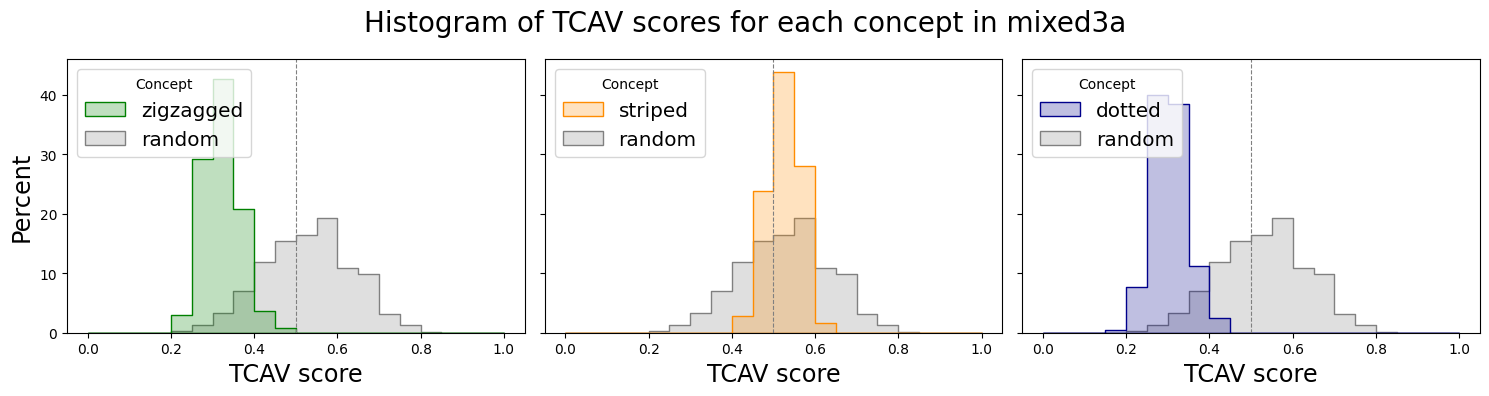

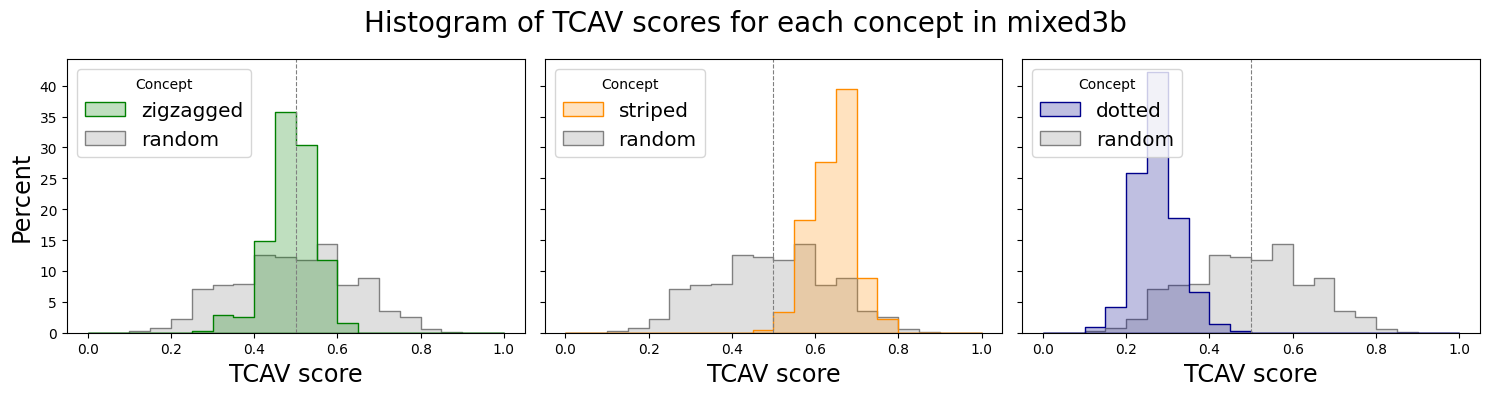

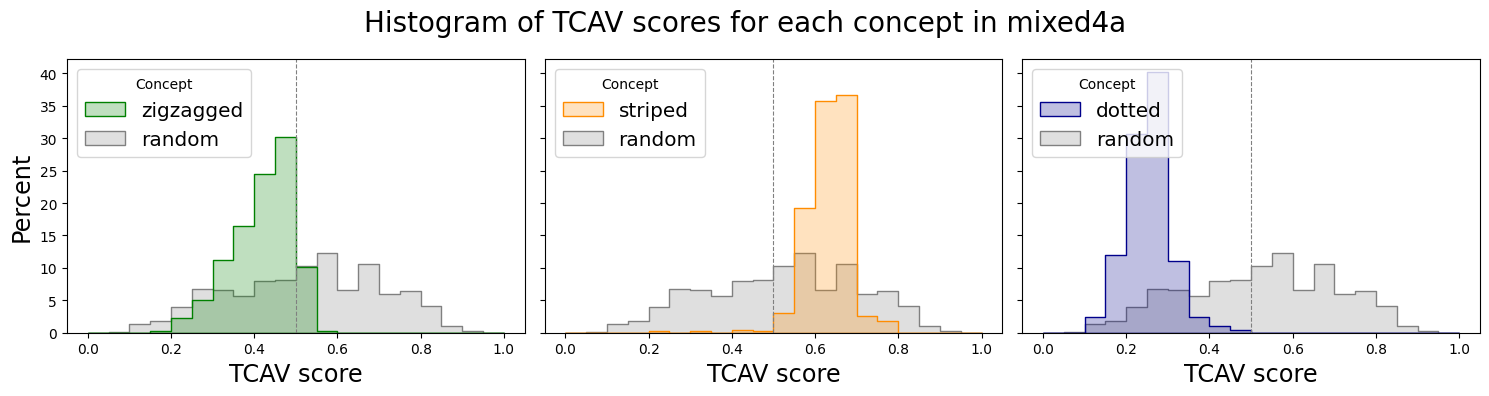

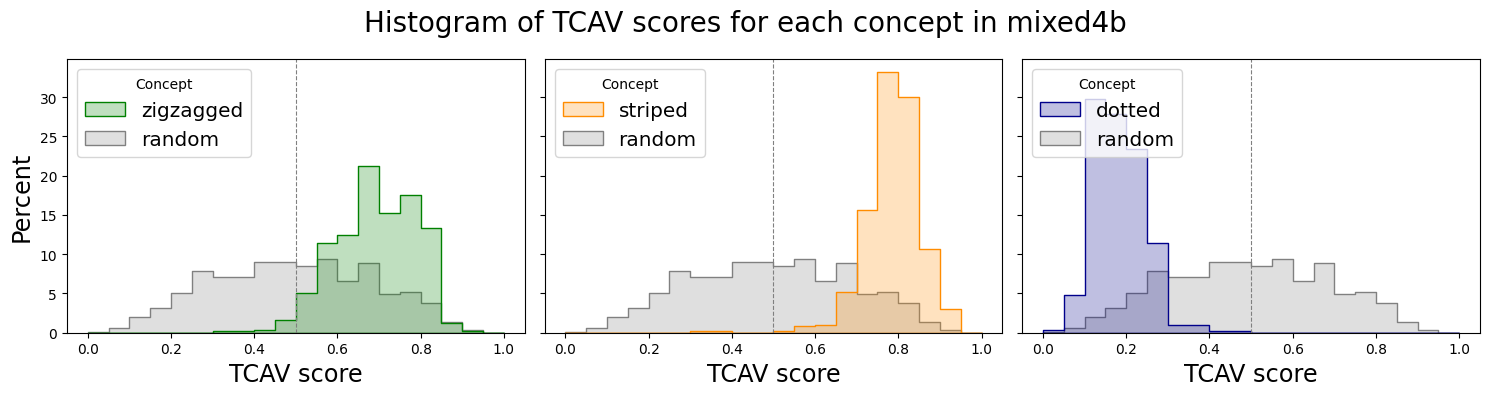

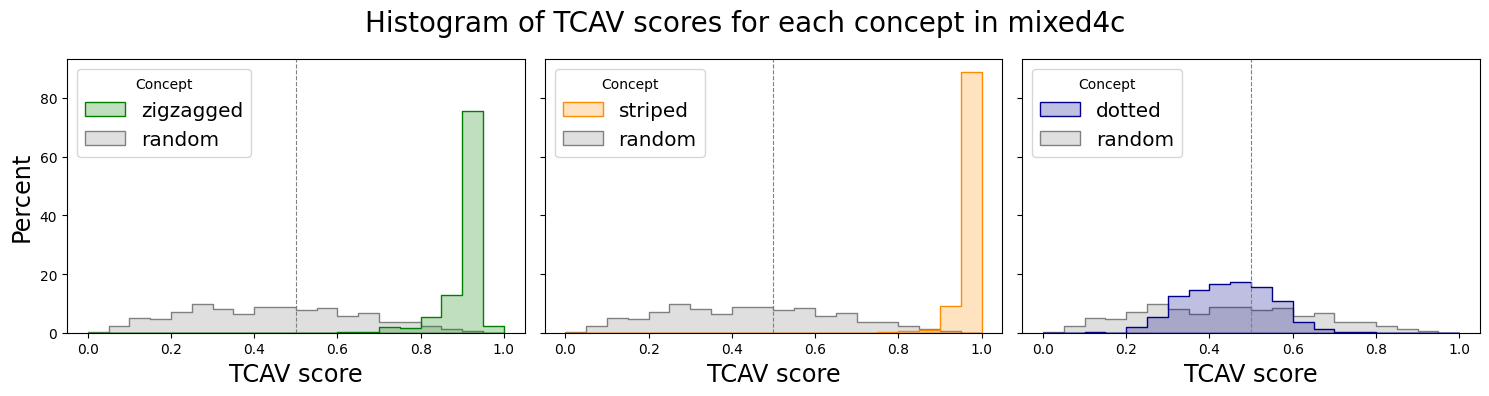

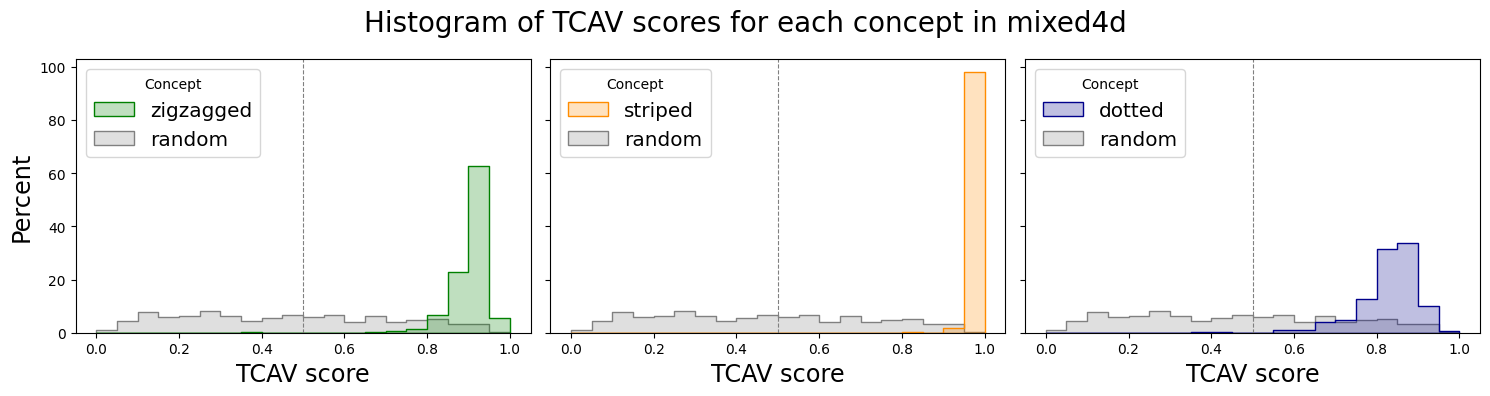

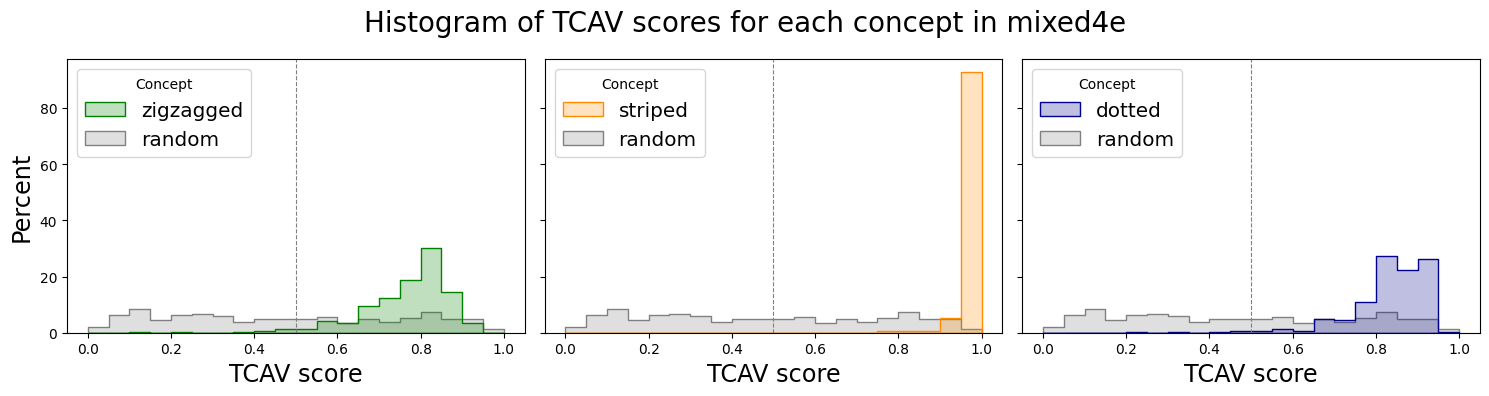

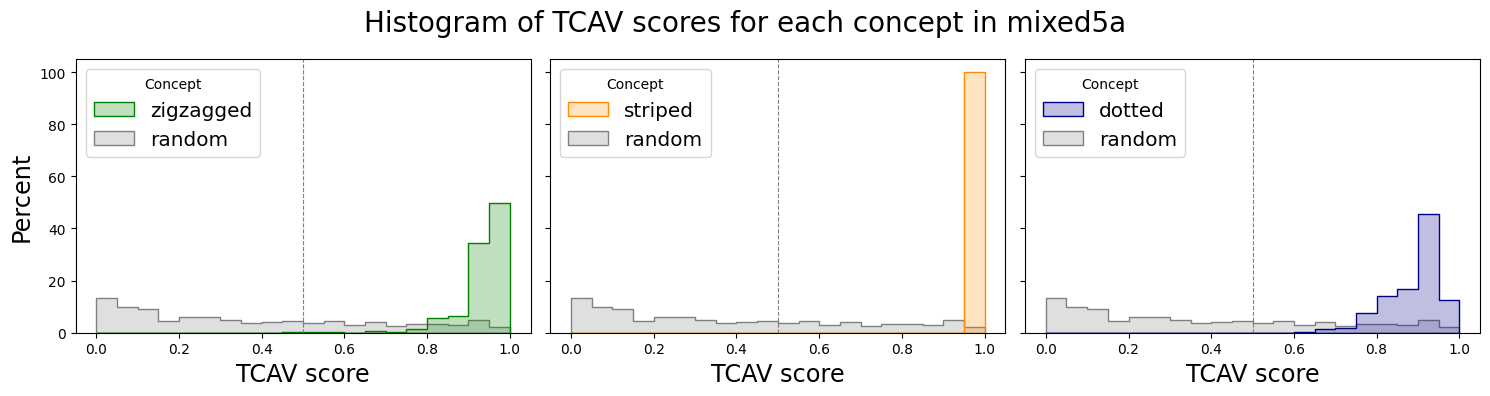

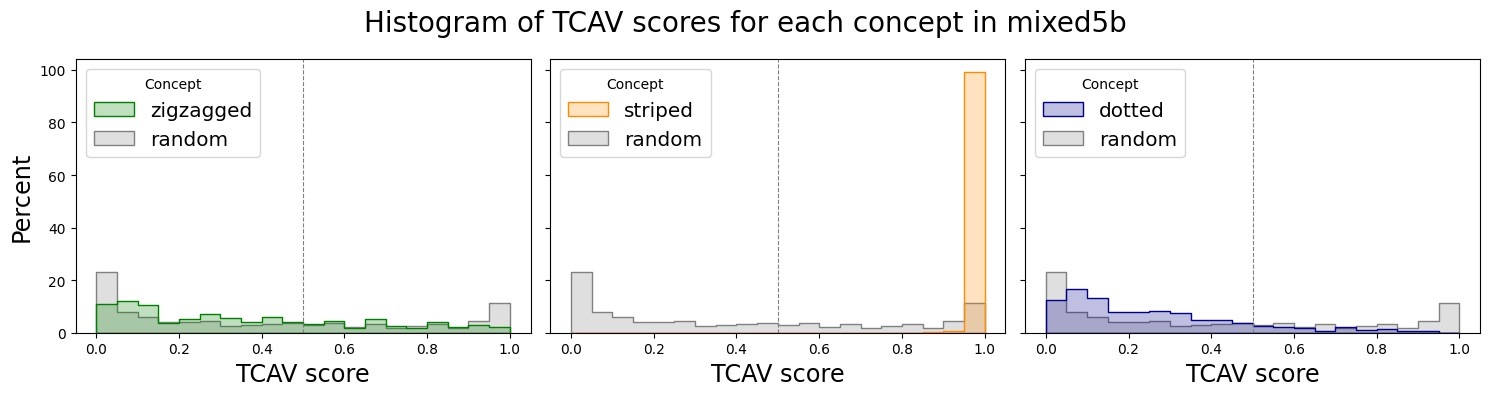

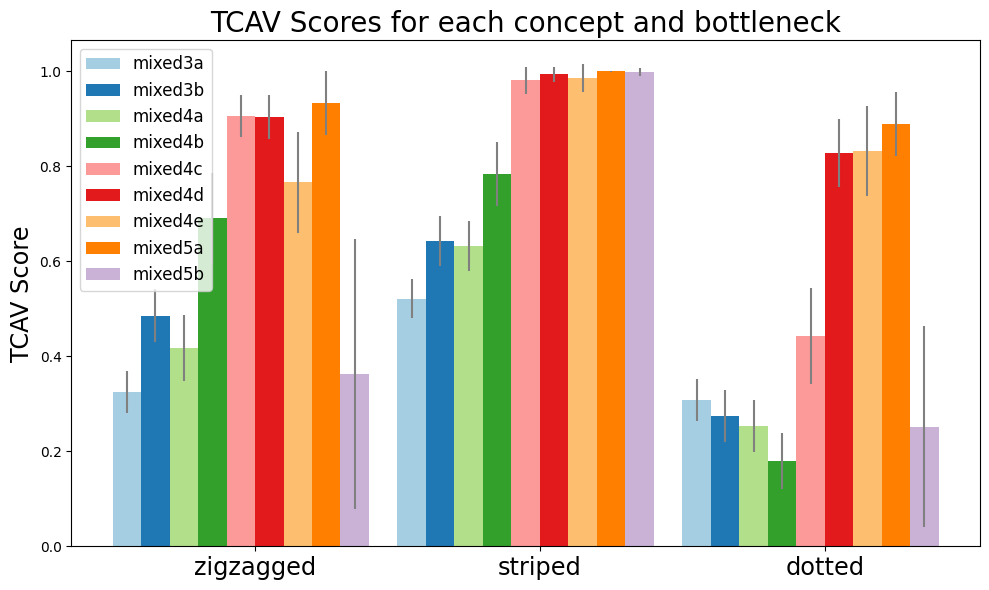

In [5]:
t_test_mean = 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 27 #2
alternative = 'two-sided' # 'less' # 'greater'
num_random = 5 
distribution_info = utils_plot.plot_results(data, num_random_exp=num_random, plot_hist = True,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = t_test_mean, save_fig = False) # 

In [6]:
# create 4 df with correct column names
layers = ['mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d','mixed4e', 'mixed5a', 'mixed5b']
idx = ['mean','std','p-value']

df_dot = pd.DataFrame(index = layers, columns = [np.array(['dotted']*3),np.array(idx)], dtype = 'float')
df_str = pd.DataFrame(index = layers, columns = [np.array(['striped']*3),np.array(idx)], dtype = 'float')
df_zig = pd.DataFrame(index = layers, columns = [np.array(['zigzagged']*3),np.array(idx)], dtype = 'float')
df_ran = pd.DataFrame(index = layers, columns = [np.array(['random']*3),np.array(idx)], dtype = 'float')

In [7]:

val_list = ['bn_vals','bn_stds','p-value']#,'significant']
for layer in layers:
    for v, value in enumerate(val_list):
        for i in range(3):
            if i == 2:
                df_dot.loc[layer,'dotted'][v] = distribution_info[layer][value][i]
            elif i == 1:
                distribution_info[layer][value][i]
                df_str.loc[layer,'striped'][v] = distribution_info[layer][value][i]
            else:
                distribution_info[layer][value][i]
                df_zig.loc[layer,'zigzagged'][v] = distribution_info[layer][value][i]

In [8]:
for layer in layers:
    print(layer,'significant',distribution_info[layer]['random_p-value'][3])
    for i, val in enumerate(idx):
        df_ran.loc[layer,'random'][val] = distribution_info[layer]['random_p-value'][i]
        

mixed3a significant True
mixed3b significant False
mixed4a significant True
mixed4b significant False
mixed4c significant True
mixed4d significant True
mixed4e significant True
mixed5a significant True
mixed5b significant True


In [9]:
df_ran

random                        
             mean       std       p-value
mixed3a  0.527731  0.106931  3.546532e-37
mixed3b  0.492473  0.140202  7.385580e-03
mixed4a  0.522409  0.179255  5.028269e-10
mixed4b  0.493840  0.189841  1.052417e-01
mixed4c  0.441731  0.201025  1.165333e-45
mixed4d  0.455679  0.249539  1.365853e-18
mixed4e  0.472942  0.279566  1.423026e-06
mixed5a  0.379383  0.299301  1.344686e-83
mixed5b  0.401772  0.355001  6.641751e-42

In [10]:
pd.concat([df_dot,df_str,df_zig],axis = 1)

dotted                           striped                           \
            mean       std        p-value     mean       std        p-value   
mixed3a  0.30808  0.043321   0.000000e+00  0.52094  0.040730   2.992634e-27   
mixed3b  0.27390  0.054327  2.874901e-317  0.64284  0.052141  4.264767e-234   
mixed4a  0.25278  0.054806   0.000000e+00  0.63246  0.052829  2.422241e-217   
mixed4b  0.17956  0.058786   0.000000e+00  0.78422  0.067043  4.723268e-321   
mixed4c  0.44286  0.100660   3.894172e-32  0.98070  0.027671   0.000000e+00   
mixed4d  0.82830  0.072181   0.000000e+00  0.99372  0.015804   0.000000e+00   
mixed4e  0.83230  0.094491  4.168841e-283  0.98572  0.028693   0.000000e+00   
mixed5a  0.88928  0.066602   0.000000e+00  0.99982  0.001602   0.000000e+00   
mixed5b  0.25168  0.211232   4.203691e-96  0.99846  0.008475   0.000000e+00   

        zigzagged                           
             mean       std        p-value  
mixed3a   0.32530  0.043719  5.915398e-309  
mixed3b   0.48556  0.056177   1.627914e-08  
mixed4a   0.41658  0.069646   1.777804e-98  
mixed4b   0.69100  0.095780  5.192048e-176  
mixed4c   0.90622  0.044814   0.000000e+00  
mixed4d   0.90382  0.047172   0.000000e+00  
mixed4e   0.76608  0.106095  2.178744e-217  
mixed5a   0.93284  0.066702   0.000000e+00  
mixed5b   0.36222  0.283820   9.552690e-25

In [9]:
with open(f'SavedResults/imagenet_tcav_results/concept_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
     label = 'app_tab:imagenet stat num concept'))

with open(f'SavedResults/imagenet_tcav_results/random_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))


/tmp/ipykernel_27067/1468983682.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
/tmp/ipykernel_27067/1468983682.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))
